# HDT 6 Redes neuronales

## Creación del modelo

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para graficar en 3-D

In [17]:
# Por facilidad, se declara una variable para indicar el tamaño del conjunto 
#      de datos de entrenamiento. Puede probarse con 100,000 o 1,000,000 pero hay 
#      que tener cuidado ya que con tantas observaciones puede que la máquina se quede!

observaciones = 1000000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1,x2))

# Verificar la forma de la matriz 
# Debiera ser n x k, donde n es el número de observaciones, y k es el número de variables.

print (X.shape)

(1000000, 2)


In [18]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

metas = 2 * x1 - 3 * x2 + 5 + ruido
#metas = 13 * x1 + 7 * x2 - 12 + ruido

# Verificar las dimensiones. Deben ser n x m, donde m es el número de variables de salida.
print (metas.shape)

(1000000, 1)


In [19]:
print(x1.shape)
print(x2.shape)
print(metas.shape)

(1000000, 1)
(1000000, 1)
(1000000, 1)


In [20]:
"""x1N = x1.reshape(observaciones,)
x2N = x2.reshape(observaciones,)
metasN = metas.reshape(observaciones,)

fig = px.scatter_3d(x = x1N, y = x2N, z = metasN)

fig.update_layout(
    width = 500,
    height = 500,)

fig.show()"""

'x1N = x1.reshape(observaciones,)\nx2N = x2.reshape(observaciones,)\nmetasN = metas.reshape(observaciones,)\n\nfig = px.scatter_3d(x = x1N, y = x2N, z = metasN)\n\nfig.update_layout(\n    width = 500,\n    height = 500,)\n\nfig.show()'

In [21]:
rango_inicial = 0.1     #  valor máximo para los pesos y sesgos iniciales

pesos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size = (2, 1))

sesgos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size = 1)

#Ver cómo fueron inicializados.
print (pesos)
print (sesgos)

[[-0.01812822]
 [ 0.08932592]]
[-0.0211854]


In [22]:
pesos.shape

(2, 1)

In [23]:
eta = 0.02

In [24]:
#for i in range(1000)
for i in range (100):
    
    # Esta es la ecuacion del modelo lineal: y = xw + b 
    y = np.dot(X, pesos) + sesgos
    
    # Las deltas son las diferencias entre las salidas y las metas (targets)
    # deltas es un vector 1000 x 1
    deltas = y - metas
    """Cambios de las funciones"""
    perdida = np.sum(deltas ** 2) / 2 / observaciones
    #perdida = np.sum(deltas ** 2) / observaciones   
    #perdida = np.sum(np.abs(deltas)) / observaciones
    

    #print(perdida)
    
    deltas_escaladas = deltas / observaciones
      
    pesos = pesos - eta * np.dot(X.T, deltas_escaladas)
    sesgos = sesgos - eta * np.sum(deltas_escaladas)
    
    # Los pesos son actualizados en forma de algebra lineal(una matriz menos otra)
    # Sin embargo, los sesgos en este caso son solo un número (solo se calcula una salida), 
    #       es necesario transformar las deltas a un escalar.      
    # Ambas líneas son consistentes con la metodología de decenso de gradiente

In [25]:
print(pesos, sesgos)

[[ 1.99980426]
 [-2.99994852]] [4.33311565]


## Tasa de aprendizaje 0.0001

Pesos finales: [[ 0.56567496]
 [-0.80474663]]
Sesgo final: [0.11729479]


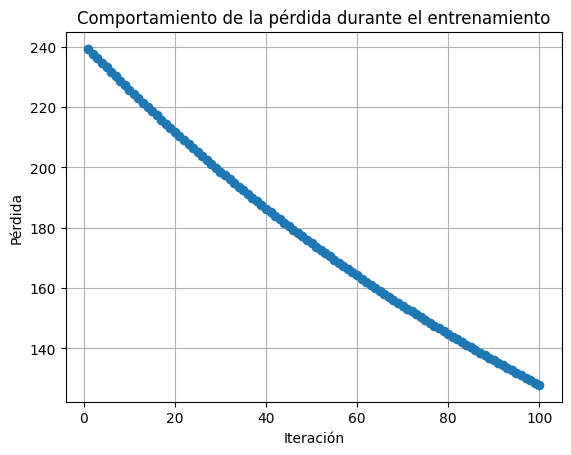

In [26]:
import numpy as np
import matplotlib.pyplot as plt

observaciones = 1000

x1 = np.random.uniform(low=-10, high=10, size=(observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1, x2))

ruido = np.random.uniform(-1, 1, (observaciones,1))

metas = 2 * x1 - 3 * x2 + 5 + ruido

rango_inicial = 0.1
pesos = np.random.uniform(low=-rango_inicial, high=rango_inicial, size=(2, 1))
sesgos = np.random.uniform(low=-rango_inicial, high=rango_inicial, size=1)

eta = 0.0001

# Lista para almacenar la pérdida en cada iteración
historial_perdida = []

for i in range(100):
    y = np.dot(X, pesos) + sesgos
    deltas = y - metas
    perdida = np.sum(deltas ** 2) / 2 / observaciones
    historial_perdida.append(perdida)  # Guardar la pérdida en el historial
    deltas_escaladas = deltas / observaciones
    pesos = pesos - eta * np.dot(X.T, deltas_escaladas)
    sesgos = sesgos - eta * np.sum(deltas_escaladas)

print("Pesos finales:", pesos)
print("Sesgo final:", sesgos)

# Graficar el historial de pérdida
plt.plot(range(1, 101), historial_perdida, marker='o', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.title('Comportamiento de la pérdida durante el entrenamiento')
plt.grid(True)
plt.show()


In [27]:
yN = y.reshape(observaciones,)
metasN = metas.reshape(observaciones,)
fig = px.scatter(x = yN, y =  metasN)

fig.update_layout(
    width = 400,
    height = 400,)

fig.show()

## Tasa de aprendizaje 0.01

Pesos finales: [[ 1.99827193]
 [-2.99686735]]
Sesgo final: [3.15859309]


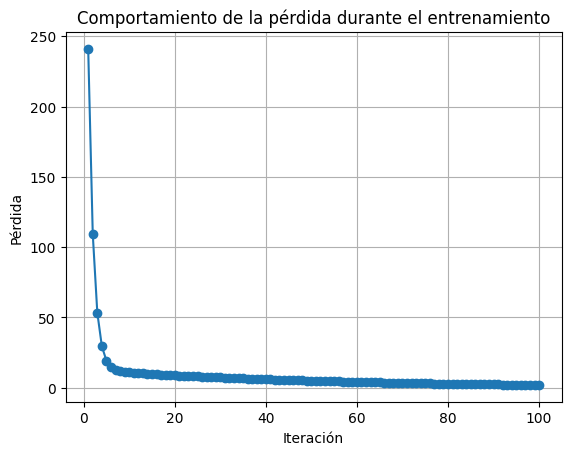

In [28]:
import numpy as np
import matplotlib.pyplot as plt

observaciones = 1000

x1 = np.random.uniform(low=-10, high=10, size=(observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1, x2))

ruido = np.random.uniform(-1, 1, (observaciones,1))

metas = 2 * x1 - 3 * x2 + 5 + ruido

rango_inicial = 0.1
pesos = np.random.uniform(low=-rango_inicial, high=rango_inicial, size=(2, 1))
sesgos = np.random.uniform(low=-rango_inicial, high=rango_inicial, size=1)

eta = 0.01

# Lista para almacenar la pérdida en cada iteración
historial_perdida = []

for i in range(100):
    y = np.dot(X, pesos) + sesgos
    deltas = y - metas
    perdida = np.sum(deltas ** 2) / 2 / observaciones
    historial_perdida.append(perdida)  # Guardar la pérdida en el historial
    deltas_escaladas = deltas / observaciones
    pesos = pesos - eta * np.dot(X.T, deltas_escaladas)
    sesgos = sesgos - eta * np.sum(deltas_escaladas)

print("Pesos finales:", pesos)
print("Sesgo final:", sesgos)

# Graficar el historial de pérdida
plt.plot(range(1, 101), historial_perdida, marker='o', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.title('Comportamiento de la pérdida durante el entrenamiento')
plt.grid(True)
plt.show()

In [29]:
yN = y.reshape(observaciones,)
metasN = metas.reshape(observaciones,)
fig = px.scatter(x = yN, y =  metasN)

fig.update_layout(
    width = 400,
    height = 400,)

fig.show()

## Tasa de aprendizaje 1

Pesos finales: [[-1.62310312e+152]
 [-8.96553213e+151]]
Sesgo final: [-1.88374873e+149]


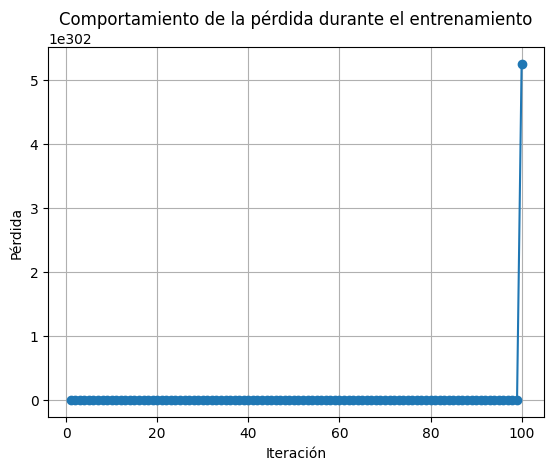

In [30]:
import numpy as np
import matplotlib.pyplot as plt

observaciones = 1000

x1 = np.random.uniform(low=-10, high=10, size=(observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1, x2))

ruido = np.random.uniform(-1, 1, (observaciones,1))

metas = 2 * x1 - 3 * x2 + 5 + ruido

rango_inicial = 0.1
pesos = np.random.uniform(low=-rango_inicial, high=rango_inicial, size=(2, 1))
sesgos = np.random.uniform(low=-rango_inicial, high=rango_inicial, size=1)

eta = 1

# Lista para almacenar la pérdida en cada iteración
historial_perdida = []

for i in range(100):
    y = np.dot(X, pesos) + sesgos
    deltas = y - metas
    perdida = np.sum(deltas ** 2) / 2 / observaciones
    historial_perdida.append(perdida)  # Guardar la pérdida en el historial
    deltas_escaladas = deltas / observaciones
    pesos = pesos - eta * np.dot(X.T, deltas_escaladas)
    sesgos = sesgos - eta * np.sum(deltas_escaladas)

print("Pesos finales:", pesos)
print("Sesgo final:", sesgos)

# Graficar el historial de pérdida
plt.plot(range(1, 101), historial_perdida, marker='o', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.title('Comportamiento de la pérdida durante el entrenamiento')
plt.grid(True)
plt.show()

In [31]:
yN = y.reshape(observaciones,)
metasN = metas.reshape(observaciones,)
fig = px.scatter(x = yN, y =  metasN)

fig.update_layout(
    width = 400,
    height = 400,)

fig.show()